In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [12]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [13]:
data.shape

(4269, 13)

In [14]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

#Checking for Duplicates

In [15]:
data.duplicated().sum()

0

show if data is IMBALANCED

<Axes: xlabel=' loan_status', ylabel='count'>

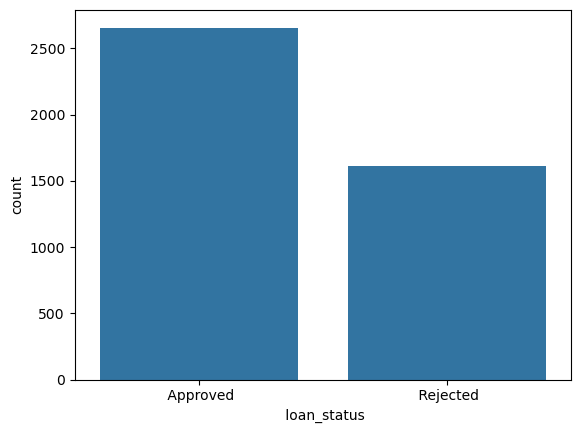

In [16]:
sns.countplot(x=' loan_status',data=data)

In [17]:
data.columns = data.columns.str.strip()  #Removing unecessary spaces in Columns name and Column values , since it can produce unecessary errors in future

In [18]:
#Handle missing values
data['loan_id'] = data['loan_id'].fillna(data['loan_id'].mode()[0])
data['loan_amount'] = data['loan_amount'].fillna(data['loan_amount'].median())
data['loan_term'] = data['loan_term'].fillna(data['loan_term'].mode()[0])
data['cibil_score'] = data['cibil_score'].fillna(data['cibil_score'].median())
data['no_of_dependents'] = data['no_of_dependents'].fillna(data['no_of_dependents'].mode()[0])

ENCODE categorical variables

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    
#converts strings to integers so ML models can process them.

split data

In [20]:
from sklearn.model_selection import train_test_split

X=data.drop(['loan_status', 'loan_id'], axis=1)
y=data['loan_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Train a Classification Model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, solver='lbfgs', C=1.0, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

Evaluate performance

              precision    recall  f1-score   support

    Rejected       0.82      0.84      0.83       664
    Approved       0.72      0.70      0.71       404

    accuracy                           0.79      1068
   macro avg       0.77      0.77      0.77      1068
weighted avg       0.78      0.79      0.78      1068



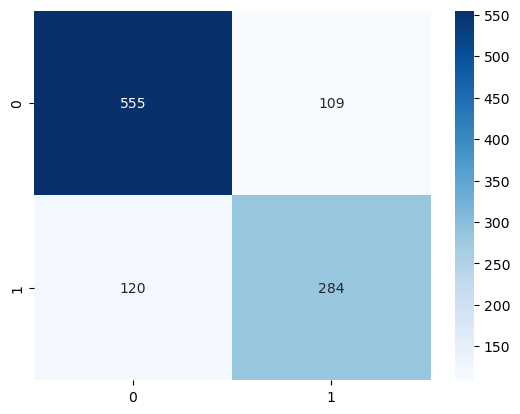

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, y_pred, target_names=["Rejected", "Approved"]))


SMOTE AND SCALING

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(class_weight={0:1, 1:2}, max_iter=1000)
model.fit(X_train_res_scaled, y_train_res)


y_pred = model.predict(X_test_scaled)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[608  56]
 [ 13 391]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       664
           1       0.87      0.97      0.92       404

    accuracy                           0.94      1068
   macro avg       0.93      0.94      0.93      1068
weighted avg       0.94      0.94      0.94      1068

